## Problem statement: 

To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### Load image dataset using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

This assignment uses a dataset of about 2239 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [2]:
#Local system Path for trining data
data_dir_train = pathlib.Path("/Users/vinitkumar/Workspace/Course/Upgrad/Module/DL/CNN/CNN_Assignment/melanoma_detection/Skin cancer ISIC The International Skin Imaging Collaboration/Train")

# Path for generating images using Augmentor library in Model 3
# Keeping both path at same place for ease of manual folder replacement
train_data_path = "/Users/vinitkumar/Workspace/Course/Upgrad/Module/DL/CNN/CNN_Assignment/melanoma_detection/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"

In [3]:
# Google drive path

#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
# Defining the path for train images dataset
#data_dir_train = pathlib.Path("/content/drive/Othercomputers/My MacBook Air/Skin cancer ISIC The International Skin Imaging Collaboration/Train")

# Path for generating images using Augmentor library in Model 3
# Keeping both path at same place for ease of manual folder replacement

#train_data_path="/content/drive/Othercomputers/My MacBook Air/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"

In [5]:
#check image count in the dataset
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

2239


### Create train and validation dataset

In [6]:
# Define batch and image sizes
batch_size = 32
img_height = 180
img_width  = 180

Using 80% of the images for training, and 20% for validation.

In [7]:
## Creating train dataset
## using seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Resizing images to the size img_height*img_width (180,180) for train dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## Creating validation dataset
## Using seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Resizing images to the size img_height*img_width(180,180)for validation dataset also
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
# Listing out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [10]:
import matplotlib.pyplot as plt

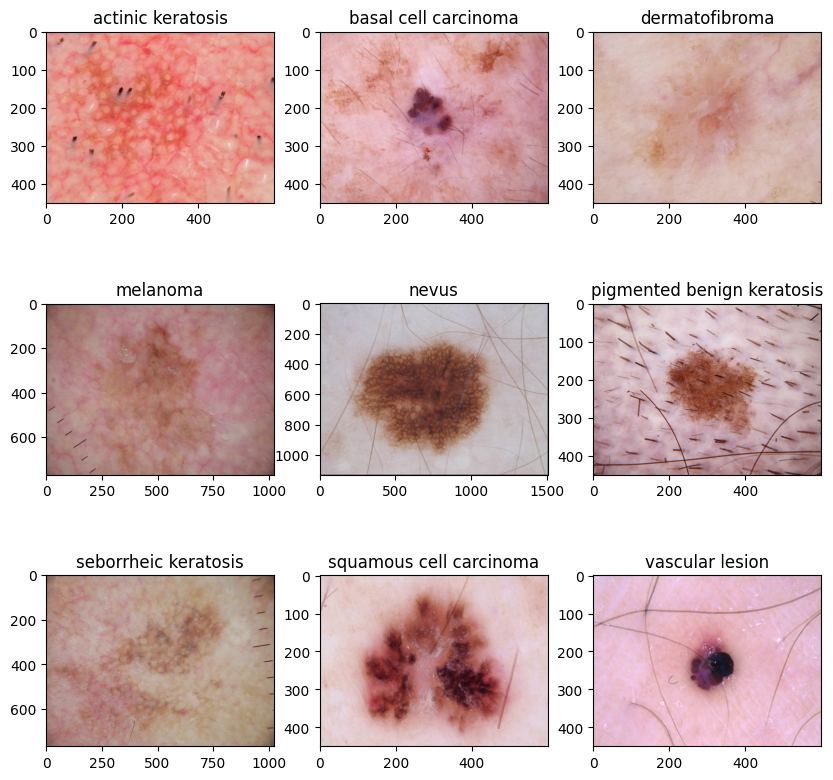

In [11]:
# Printing one image from each class 
plt.figure(figsize=(10,10))
for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

In [12]:
# Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.
# Dataset.prefetch() overlaps data preprocessing and model execution while training.
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Model 1:

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. 
Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [13]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [14]:
num_classes = 9 # no of classes

#Sequential allows to create models layer-by-layer  
model = Sequential()

#Rescaling layer for Images
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)))

#First Convulation layer
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (180, 180, 32)))

#Second Convulation layer
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2))) #Pooling

#Third Convulation layer
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2))) #Pooling

#Fourth Convulation layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2))) #Pooling

#Fifth Convulation layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2))) #Pooling

#Dropout layer
model.add(Dropout(0.25))

#Flatten Layer
model.add(Flatten())
#Dense Layer with softmax activation function.
model.add(Dense(num_classes, activation = "softmax"))

#Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

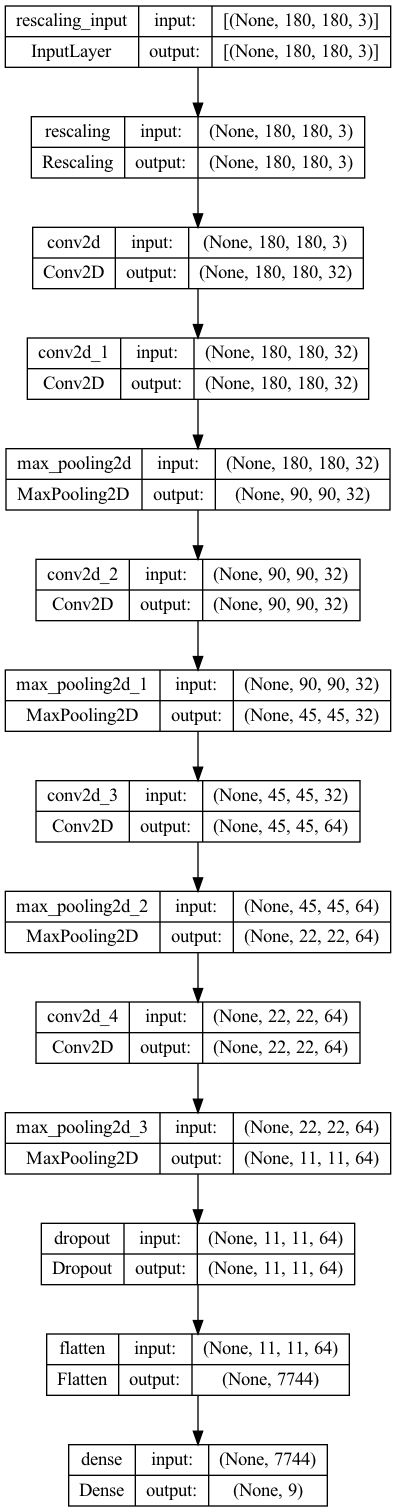

In [15]:
# vizualizing the model 
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### Compile the model

In [16]:
# Choosing adam optimiser and SparseCategoricalCrossentropy loss function for model training 
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train the model

In [17]:
# Model training for 20 epochs
epochs = 20
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/20


/Users/vinitkumar/Library/Python/3.9/lib/python/site-packages/keras/backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2022-12-14 19:47:54.820485: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


56/56 [==============================] - 36s 564ms/step - loss: 2.0386 - accuracy: 0.2132 - val_loss: 1.8832 - val_accuracy: 0.3177
Epoch 2/20
56/56 [==============================] - 32s 570ms/step - loss: 1.7876 - accuracy: 0.3465 - val_loss: 1.9168 - val_accuracy: 0.2550
Epoch 3/20
56/56 [==============================] - 34s 617ms/step - loss: 1.6529 - accuracy: 0.3884 - val_loss: 1.5779 - val_accuracy: 0.4362
Epoch 4/20
56/56 [==============================] - 35s 621ms/step - loss: 1.5699 - accuracy: 0.4436 - val_loss: 1.5222 - val_accuracy: 0.4765
Epoch 5/20
56/56 [==============================] - 37s 668ms/step - loss: 1.4831 - accuracy: 0.4816 - val_loss: 1.4713 - val_accuracy: 0.4832
Epoch 6/20
56/56 [==============================] - 36s 637ms/step - loss: 1.3968 - accuracy: 0.5128 - val_loss: 1.4157 - val_accuracy: 0.5168
Epoch 7/20
56/56 [==============================] - 39s 697ms/step - loss: 1.3830 - accuracy: 0.5190 - val_loss: 1.4103 - val_accuracy: 0.5123
Epoch 8/20

### Visualizing training results

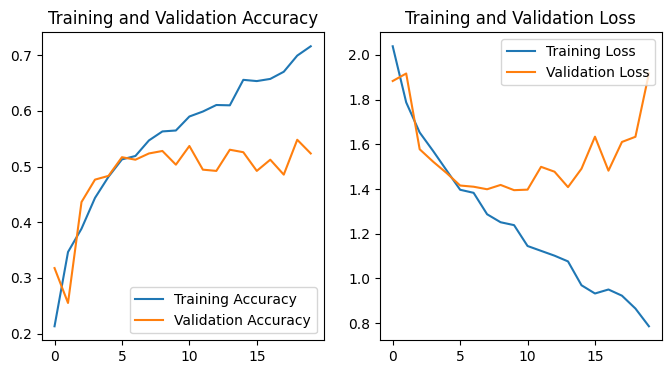

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Finding on the first base model :

- Around till 13th epoch there is clear sign of underfitting as both training & validation accuracy are pretty low and just above to 50%
- Although training accuracy improves after consistantly validation accuracy has not improved.
- From 14th epoch onwards there is clearly overfitting as significant difference in training and validation accuracy.

## Model 2:

In [19]:
# After analysing the model fit history for presence of underfit or overfit, considering an appropriate data augumentation strategy. 
data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

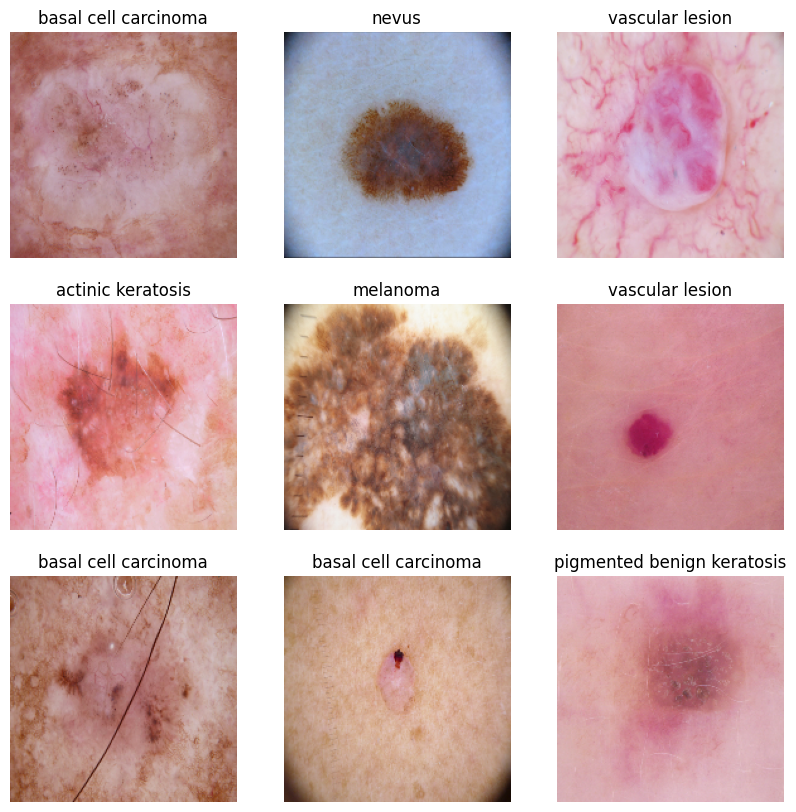

In [20]:
# Visualize how augmentation strategy worked for one instance of training image.
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Create the model, compile and train the model after Augmentation


In [21]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [22]:
num_classes = 9 # no of classes

#Sequential allows to create models layer-by-layer  
model = Sequential()

#Rescaling layer for Images
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)))

#First Convulation layer
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (180, 180, 32)))

#Second Convulation layer
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2))) #Pooling

#Third Convulation layer
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2))) #Pooling

#Fourth Convulation layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2))) #Pooling

#Fifth Convulation layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2))) #Pooling

#Dropout layer
model.add(Dropout(0.25))

#Flatten Layer
model.add(Flatten())
#Dense Layer with softmax activation function.
model.add(Dense(num_classes, activation = "softmax"))

#Model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

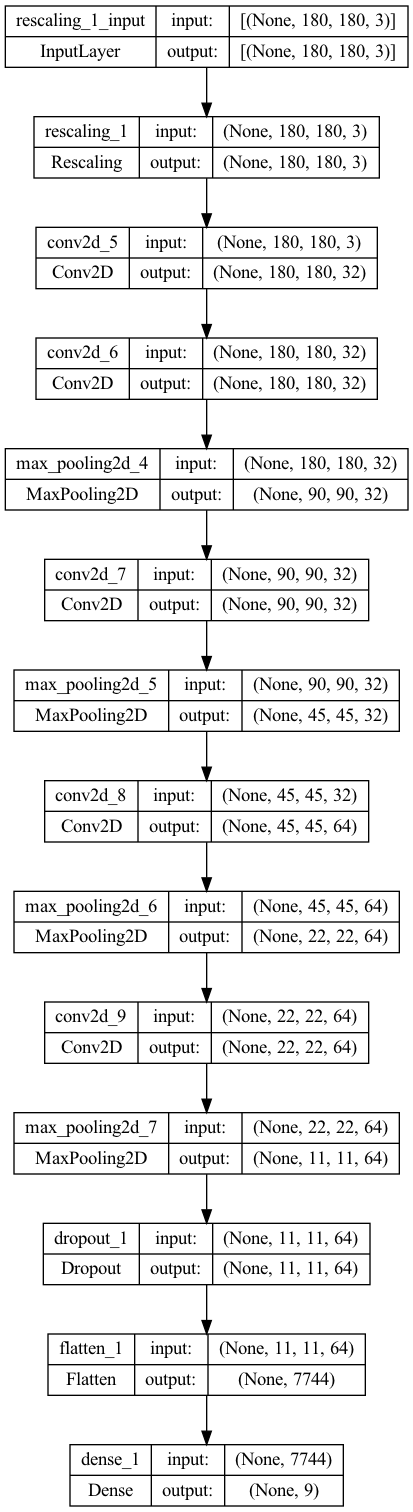

In [23]:
# vizualizing the model 
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### Compiling the model

In [24]:
# Choosing adam optimiser and SparseCategoricalCrossentropy loss function for model training 
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [25]:
# Model training for 20 epochs
epochs=20
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/20
56/56 [==============================] - 41s 732ms/step - loss: 1.9678 - accuracy: 0.2556 - val_loss: 1.7971 - val_accuracy: 0.3468
Epoch 2/20
56/56 [==============================] - 41s 731ms/step - loss: 1.6550 - accuracy: 0.4074 - val_loss: 1.5336 - val_accuracy: 0.4720
Epoch 3/20
56/56 [==============================] - 39s 702ms/step - loss: 1.5627 - accuracy: 0.4442 - val_loss: 1.5678 - val_accuracy: 0.4676
Epoch 4/20
56/56 [==============================] - 39s 698ms/step - loss: 1.4798 - accuracy: 0.4688 - val_loss: 1.4648 - val_accuracy: 0.4922
Epoch 5/20
56/56 [==============================] - 41s 729ms/step - loss: 1.3856 - accuracy: 0.5167 - val_loss: 1.4456 - val_accuracy: 0.4877
Epoch 6/20
56/56 [==============================] - 40s 707ms/step - loss: 1.3515 - accuracy: 0.5218 - val_loss: 1.4860 - val_accuracy: 0.5123
Epoch 7/20
56/56 [==============================] - 40s 709ms/step - loss: 1.2959 - accuracy: 0.5430 - val_loss: 1.3887 - val_accuracy: 0.5324

### Visualizing training results

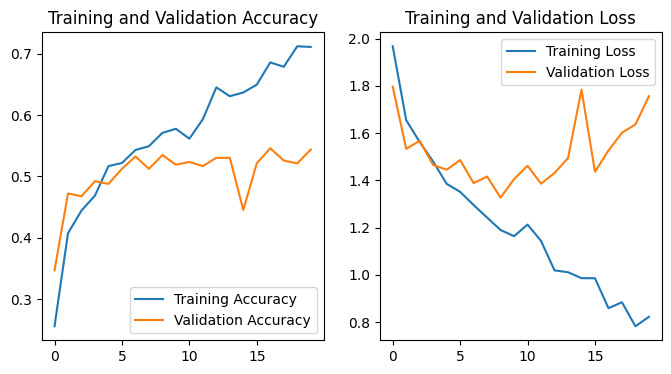

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Finding from Second Model:
- There is not much improvement in training and validation accuracy is noticed also still overfitting persist.
- Similar to model 1 pattern can be seen in 2nd model also.

## Model 3:

#### Finding the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<BarContainer object of 9 artists>

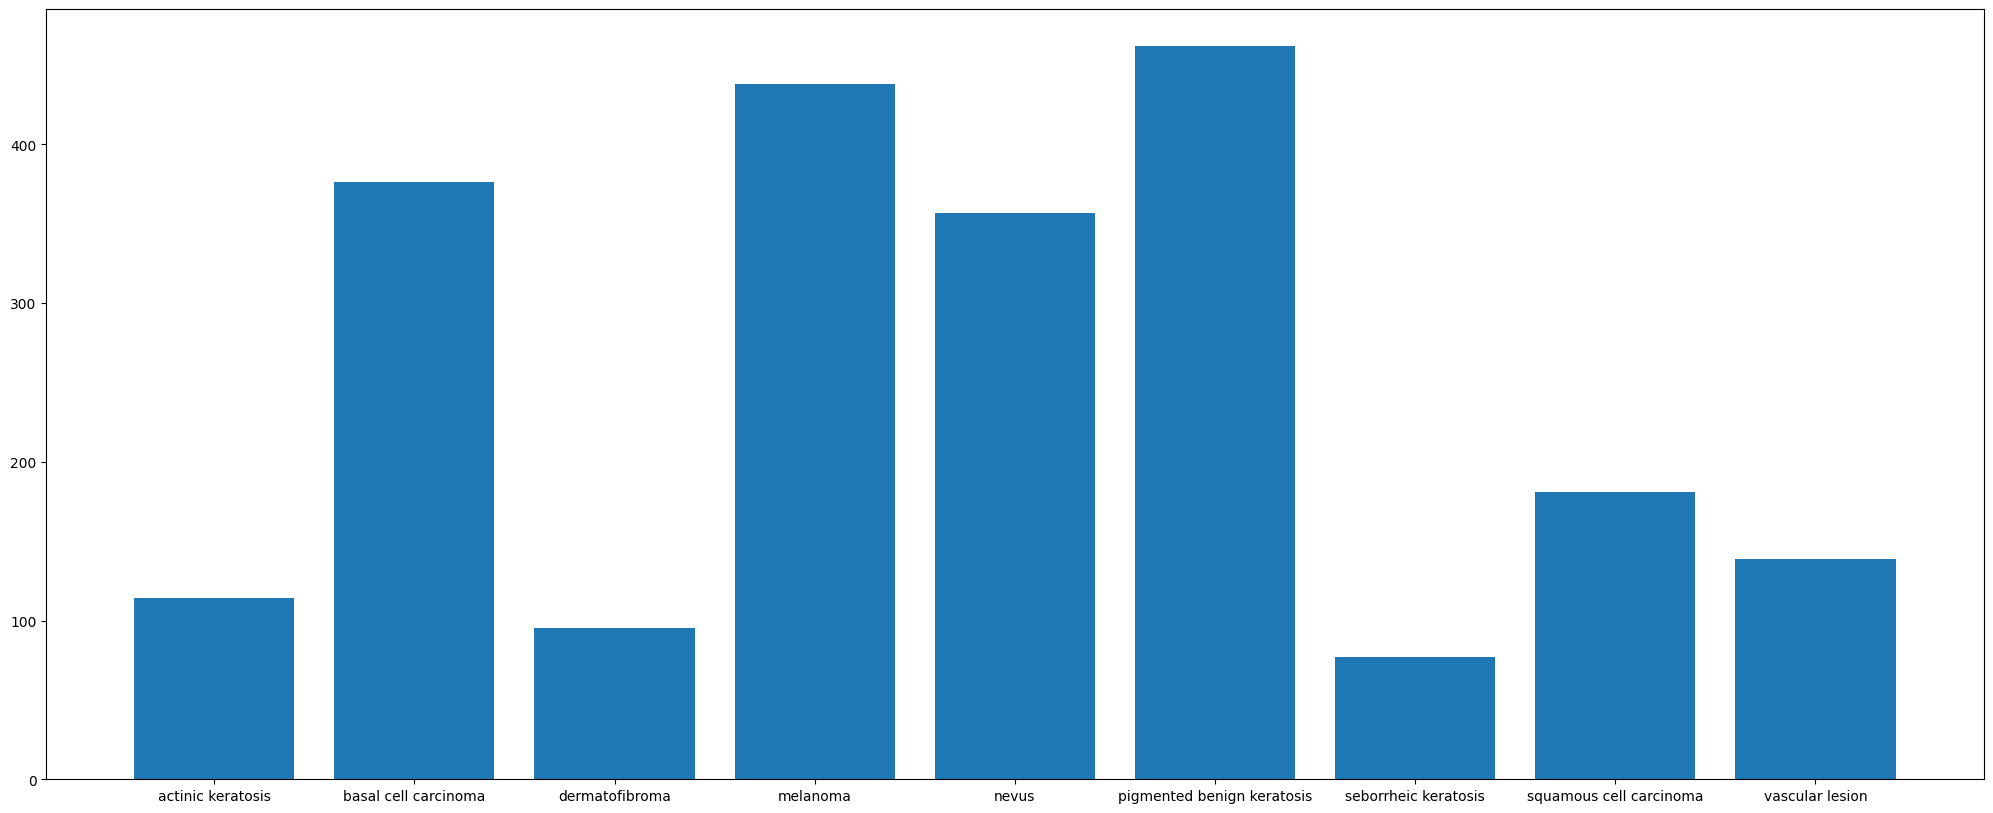

In [27]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

#### Below are the findings:
#### - Seborrheic keratosis class has the least no of images
#### - Pigmented benign keratosis dominate the data in terms proportionate number of samples


#### Rectifying the class imbalance with the help of Augmentor Library by adding more samples across all classes

In [28]:
# install Augmentor Library, if not installed already
!pip3 install Augmentor 

Defaulting to user installation because normal site-packages is not writeable


In [29]:
# Generating samples using augmentor libarary across all classes
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(train_data_path + i,save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /Users/vinitkumar/Workspace/Course/Upgrad/Module/DL/CNN/CNN_Assignment/melanoma_detection/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1


Initialised with 376 image(s) found.
Output directory set to /Users/vinitkumar/Workspace/Course/Upgrad/Module/DL/CNN/CNN_Assignment/melanoma_detection/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x174CEA700>: 100%|█|


Initialised with 95 image(s) found.
Output directory set to /Users/vinitkumar/Workspace/Course/Upgrad/Module/DL/CNN/CNN_Assignment/melanoma_detection/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x174B31430>: 100%|█|


Initialised with 438 image(s) found.
Output directory set to /Users/vinitkumar/Workspace/Course/Upgrad/Module/DL/CNN/CNN_Assignment/melanoma_detection/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=2126x2185 at 0x174CAC7F0>: 100%|


Initialised with 357 image(s) found.
Output directory set to /Users/vinitkumar/Workspace/Course/Upgrad/Module/DL/CNN/CNN_Assignment/melanoma_detection/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=576x768 at 0x1


Initialised with 462 image(s) found.
Output directory set to /Users/vinitkumar/Workspace/Course/Upgrad/Module/DL/CNN/CNN_Assignment/melanoma_detection/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1


Initialised with 77 image(s) found.
Output directory set to /Users/vinitkumar/Workspace/Course/Upgrad/Module/DL/CNN/CNN_Assignment/melanoma_detection/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x15FF82790>: 100%|█


Initialised with 181 image(s) found.
Output directory set to /Users/vinitkumar/Workspace/Course/Upgrad/Module/DL/CNN/CNN_Assignment/melanoma_detection/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x177A51BE0>: 100%|█|


Initialised with 139 image(s) found.
Output directory set to /Users/vinitkumar/Workspace/Course/Upgrad/Module/DL/CNN/CNN_Assignment/melanoma_detection/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x174CA9730>: 100%|█|


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [30]:
#Count total number of image generated by Augmentor.
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


<BarContainer object of 9 artists>

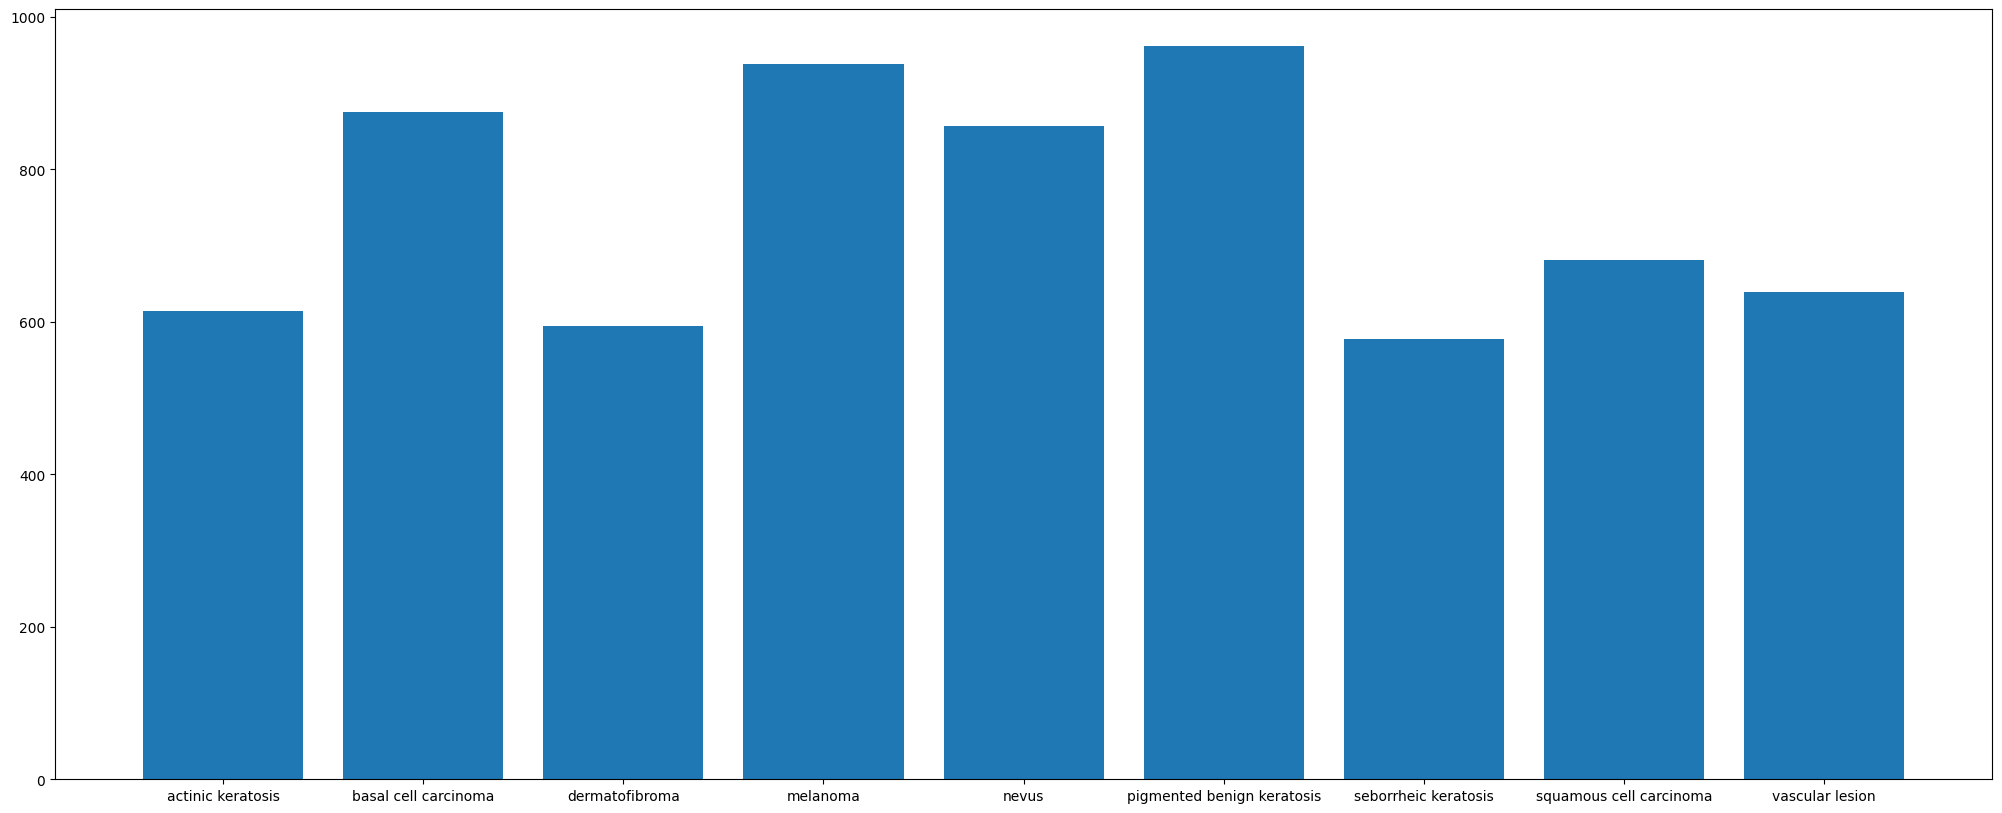

In [31]:
# Lets see the distribution of augmented data after adding new images to the original training data.
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'*/output/*.jpg'))) + len(list(data_dir_train.glob(i+'/*.jpg'))) )
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

In [32]:
# Creating training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, batch_size=32,
                                                               image_size=(180,180), label_mode='categorical',
                                                               seed=123,subset="training",
                                                               validation_split=0.2)

#label_mode is categorial, the labels are a float32 tensor of shape (batch_size, num_classes),
#representing a one-hot encoding of the class index.

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [33]:
# Creating validation dataset
val_ds =tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=32,
                                                            image_size=(180,180), label_mode='categorical',
                                                            seed=123,subset="validation",
                                                            validation_split=0.2)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [34]:
#tf.data.experimental.AUTOTUNE defines appropriate number of processes that are free for working.

#`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

#`Dataset.prefetch()` overlaps data preprocessing and model execution while training.


AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [35]:
#CNN Model Architecture

#Sequential allows you to create models layer-by-layer  
model = Sequential()

model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer

#First Convulation layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 50% Fraction of the input units to drop.
model.add(layers.Dropout(0.5))

#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())

#Dense Layer
model.add(layers.Dense(128,activation='relu'))

#Dropout layer with 25% Fraction of the input units to drop.
model.add(layers.Dropout(0.25))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names),activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 41, 41, 128)      

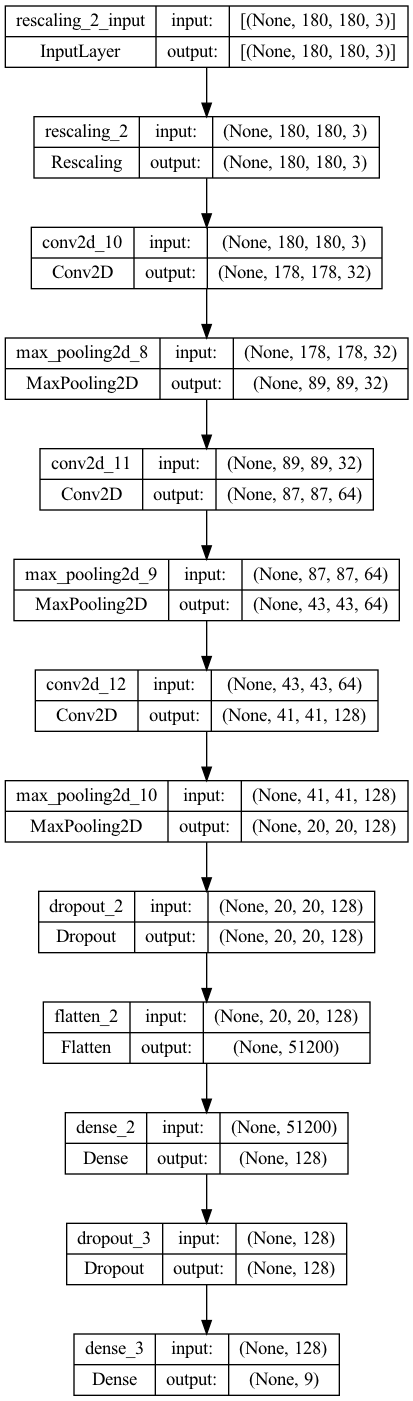

In [36]:
# vizualizing the model 
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [37]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

In [38]:
#Compile the Model

#Adam optimization: is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#categorical_crossentropy: Used as a loss function for multi-class classification model where there are two or more output labels.

model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

#ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval,
#so the model or weights can be loaded later to continue the training from the state saved.
checkpoint = ModelCheckpoint("model.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)

#Stop training when a monitored metric has stopped improving.
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)

In [39]:
# Train the model for 30 epochs
# NOTE : Training for 30 epochs as, assignment problem statement says to trin on 30 epoch while 
# evaluation metric says to trin on 20 epochs
# Also using ModelCheckpoint and earlystop in case large epocs dosen't improve performance 

epochs = 30
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs,callbacks=[checkpoint,earlystop])

Epoch 1/30


2022-12-14 20:15:04.984829: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 130 of 1000
2022-12-14 20:15:07.735357: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


169/169 [==============================] - ETA: 0s - loss: 1.7949 - accuracy: 0.3082
Epoch 1: val_accuracy improved from -inf to 0.44915, saving model to model.h5
169/169 [==============================] - 98s 502ms/step - loss: 1.7949 - accuracy: 0.3082 - val_loss: 1.4898 - val_accuracy: 0.4491
Epoch 2/30
169/169 [==============================] - ETA: 0s - loss: 1.4883 - accuracy: 0.4447
Epoch 2: val_accuracy improved from 0.44915 to 0.51745, saving model to model.h5
169/169 [==============================] - 76s 448ms/step - loss: 1.4883 - accuracy: 0.4447 - val_loss: 1.3351 - val_accuracy: 0.5174
Epoch 3/30
169/169 [==============================] - ETA: 0s - loss: 1.3485 - accuracy: 0.4970
Epoch 3: val_accuracy improved from 0.51745 to 0.53675, saving model to model.h5
169/169 [==============================] - 79s 469ms/step - loss: 1.3485 - accuracy: 0.4970 - val_loss: 1.2197 - val_accuracy: 0.5367
Epoch 4/30
169/169 [==============================] - ETA: 0s - loss: 1.2192 - ac

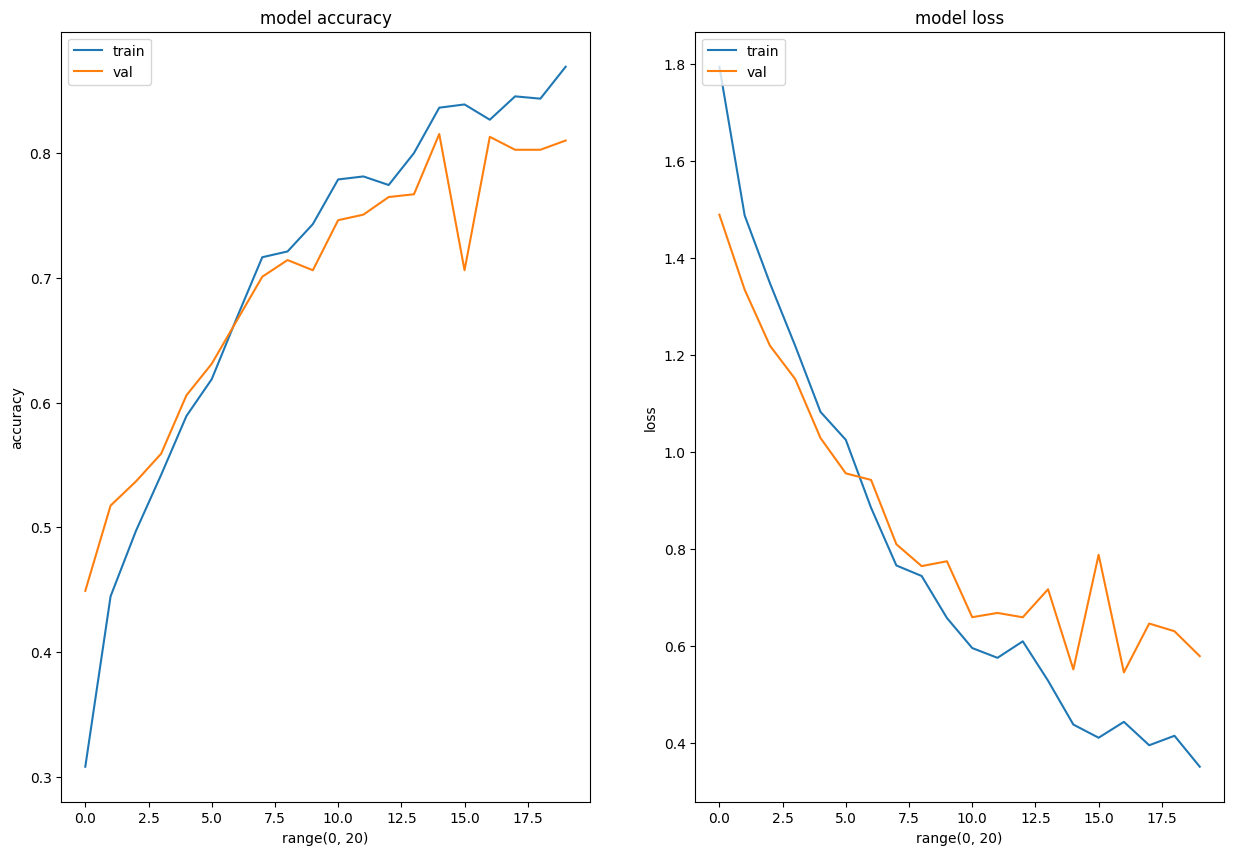

In [40]:
# Plot the training curves

epochs_range = range(earlystop.stopped_epoch+1)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)

#Plot Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')

#Plot Model Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Findings:
 - Overfitting/Underfitting issue is resolved and model is giving decent performance.
 - From 17th epoch onwards trining accuracy seems to be flat and range from 80 - 86%
 - From 17th epoch onwards validation accuracy also seems to be flat and close to 81%
 - Model looks good with minimum difference in training & validation accuracy within range of 80-85 % of training & validation accuracy
 - Also loss range between 0.35 to 0.55 for training & validation loss.  